In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Code import utility as u
from Code import ray as r
from Code import material as m
from Code import monte_carlo as mc
from Code import plotting as plot

import time

In [2]:
np.random.seed(2)
air = m.Material(1.0,0,{'mean':100000})
glass = m.Material(1.5+1E-7*1j,  70E-7,{'mean':2.5E-6})
ray = r.Ray(u.normalize([0,0,1]),  np.array([0,0,0]), 0.5 )

In [3]:
rayPath = mc.MonteCarloTrace(ray, air,glass, debug= False)

In [4]:
rayPath.transmissionCumulative()

0.9999747478302696

In [5]:
len(rayPath.transmission)

14

### Full Trial - Small

timing:  0.07841110229492188  (s)


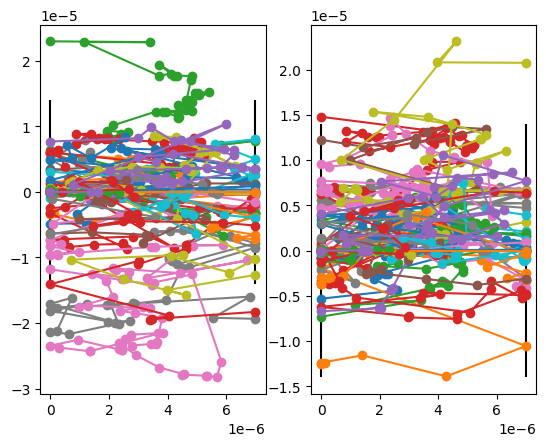

In [18]:
np.random.seed(2)
start = time.time()
raySmall = mc.MonteCarloTrial(55, air, glass, 0.5, u.KVector(0,0), debug = False)
end = time.time()
print('timing: ',end - start,' (s)')
fig, ax = plt.subplots(1,2)
plot.PlotMaterial(glass,scale = 2, ax=ax[0])
for ray in raySmall :
    plot.PlotRayPath(ray, slice = 1, ax=ax[0])    
plot.PlotMaterial(glass,scale = 2, ax=ax[1])
for ray in raySmall :
    plot.PlotRayPath(ray, slice = 0, ax=ax[1])    

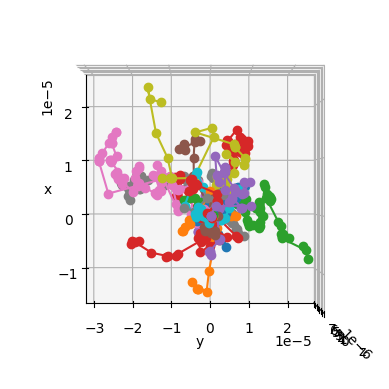

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.azim = 3
ax.dist = 10
ax.elev = -90
# Labels.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

for ray in raySmall :
    plot.PlotRayPath3D(ray, ax) 

## Full Trial - Large

In [3]:
np.random.seed(2)

start = time.time()
rays = mc.MonteCarloTrial(10000, air,glass, 0.5, u.KVector(0,0), debug = False)
end = time.time()
print('timing: ',end - start,' (s)')
len(rays)

timing:  17.226744890213013  (s)


10000

### Bin (angle)

(array([676.,  91., 134., 203., 225., 219., 203., 292., 279., 320., 305.,
        250., 302., 279., 224., 209., 148., 137.,  74.,  31.]),
 array([0.        , 0.07791926, 0.15583852, 0.23375777, 0.31167703,
        0.38959629, 0.46751555, 0.5454348 , 0.62335406, 0.70127332,
        0.77919258, 0.85711183, 0.93503109, 1.01295035, 1.09086961,
        1.16878886, 1.24670812, 1.32462738, 1.40254664, 1.48046589,
        1.55838515]),
 <BarContainer object of 20 artists>)

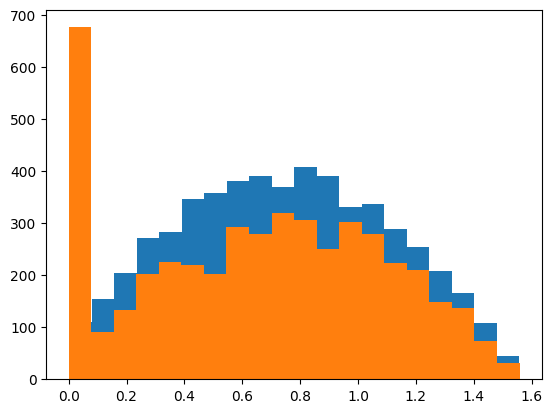

In [4]:
[binRef,binTrans ] = plot.BinRaysAngle(rays)
plt.hist(binRef,20)
plt.hist(binTrans,20)

### Bin Position

(array([1.512e+03, 8.040e+02, 6.680e+02, 4.960e+02, 3.570e+02, 2.700e+02,
        1.640e+02, 1.210e+02, 6.100e+01, 4.700e+01, 4.000e+01, 1.400e+01,
        1.400e+01, 1.000e+01, 8.000e+00, 5.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00]),
 array([0.00000000e+00, 2.73966979e-06, 5.47933957e-06, 8.21900936e-06,
        1.09586791e-05, 1.36983489e-05, 1.64380187e-05, 1.91776885e-05,
        2.19173583e-05, 2.46570281e-05, 2.73966979e-05, 3.01363676e-05,
        3.28760374e-05, 3.56157072e-05, 3.83553770e-05, 4.10950468e-05,
        4.38347166e-05, 4.65743864e-05, 4.93140561e-05, 5.20537259e-05,
        5.47933957e-05]),
 <BarContainer object of 20 artists>)

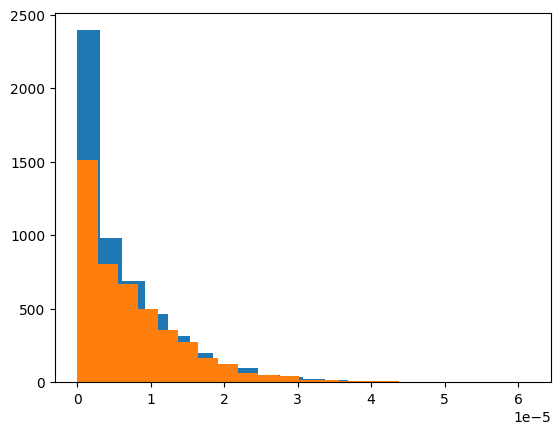

In [5]:
[binRef,binTrans ] = plot.BinRaysPosition(rays)
plt.hist(binRef,20)
plt.hist(binTrans,20)

In [12]:
np.mod(u.vectorAngle([0,0.1,-1],[0,0,1]),np.pi/2)

1.471127674303736

In [6]:
1j*1

1j

In [ ]:
isApple = True if fruit == 'Apple' else False